In [5]:
import json
import pandas as pd
import numpy as np
import os
import cv2
import pytube
import matplotlib.pyplot as plt

In [6]:
!pip install pafy yt-dlp


## 1. Importing Dataset present in JSON format

In [7]:
with open('Dataset/MS-ASL/MSASL_train.json', 'r') as train_file:

  train_data = json.load(train_file) 

In [8]:
print(type(train_data))
print(len(train_data))

<class 'list'>
16054


In [9]:
train_data[0]


{'org_text': 'match [light-a-MATCH]',
 'clean_text': 'match',
 'start_time': 0.0,
 'signer_id': 0,
 'signer': 0,
 'start': 0,
 'end': 83,
 'file': 'match light-a-MATCH',
 'label': 830,
 'height': 360.0,
 'fps': 30.0,
 'end_time': 2.767,
 'url': 'https://www.youtube.com/watch?v=C37R_Ix8-qs',
 'text': 'match',
 'box': [0.05754461884498596, 0.21637457609176636, 1.0, 0.7300844192504883],
 'width': 640.0}

In [10]:
type(train_data[0])

dict

In [11]:
train_data[0]['end_time']

2.767

In [12]:
train_df = pd.DataFrame(train_data)

In [13]:
train_df.head(5)

,org_text,clean_text,start_time,signer_id,signer,start,end,file,label,height,fps,end_time,url,text,box,width,review
0,match [light-a-MATCH],match,0.0,0,0,0,83,match light-a-MATCH,830,360.0,30.00,2.767,https://www.youtube.com/watch?v=C37R_Ix8-qs,match,"[0.05754461884498596, 0.21637457609176636, 1.0...",640.0,NaN
1,FAIL,fail,0.0,0,-1,0,74,FAIL,542,360.0,25.00,2.960,https://www.youtube.com/watch?v=PIsUJl8BN_I,fail,"[0.0657794177532196, 0.16717177629470825, 0.93...",480.0,NaN
2,laugh,laugh,0.0,4,26,0,31,SignSchool Laugh with Legs 2,312,360.0,29.97,1.034,www.youtube.com/watch?v=9FdHlMOnVjg,laugh,"[0.13188594579696655, 0.32334136962890625, 1.0...",640.0,NaN
3,BOOK,book,0.0,0,-1,0,66,BOOK(3),38,360.0,25.00,2.640,https://www.youtube.com/watch?v=J7tP98oDxqE,book,"[0.05569887161254883, 0.25173279643058777, 0.9...",480.0,NaN
4,sign-language,sign language,0.0,0,-1,0,75,SIGN-LANGUAGE-S-CLAW-F,848,360.0,29.97,2.502,www.youtube.com/watch?v=N2mG9ZKjrGA,sign language,"[0.03904399275779724, 0.24198183417320251, 1.0...",640.0,NaN


## 2. Streaming Video Samples from YouTube and Extracting Features
- to stream YouTube videos directly without needing to download it OpenCV uses ffmpeg which we need to install

In [14]:
!pip install pytube opencv-python ffmpeg-python

In [15]:
# def download_sign_videos(yt_url ,output_path):
#  yt = pytube.YouTube(yt_url)
#  stream = yt.streams.get_highest_resolution()

#  print(f"Downloading:{yt.title}")
#  stream.download(output_path)
#  print(f"Download Complete {yt.title}")

In [31]:
# def save_frames_to_disk(frames , video_name , output_dir):
#  os.makedirs(output_dir , exist_ok=True)
#  file_paths = []

#  for i , frame in enumerate(frames):
#    file_name = f'{video_name}_frame_{i}.jpg'
#    file_path = os.path.join(output_dir , file_name)

#    #save to the disk
#    cv2.imwrite(file_path  ,frame)
#    file_paths.append(file_path)
 
#  return file_paths

In [47]:
def capture_frames(video_path , start_time , end_time , fps ):
  
  video_name = os.path.splitext(os.path.basename(video_path))[0] #basename takes the last part of the file path while is 'file_title.file_type and splittext() splits the text seperated by '.

  cap = cv2.VideoCapture(video_path)
   
  if not cap.isOpened():
    print(f'Error: Could not open the video')
    return []
  
  start_frame = int(start_time * fps)
  end_frame = int(end_time * fps)

  frames = []

  for frame_no in range(start_frame , end_frame + 1):
    cap.set(cv2.CAP_PROP_POS_FRAMES , frame_no)
    ret,frame = cap.read()

    if ret:
      frames.append(frame)

  cap.release()
  return frames
 

In [48]:
train_df.loc[0]['url']

'https://www.youtube.com/watch?v=C37R_Ix8-qs'

In [49]:

frame_data = capture_frames('downloads/match [light-a-MATCH].mp4' , train_df.loc[0]['start_time'] , train_df.loc[0]['end_time'] , train_df.loc[0]['fps'])

In [50]:
frame_data

[array([[[203, 208, 191],
         [203, 208, 191],
         [203, 208, 191],
         ...,
         [224, 231, 219],
         [224, 231, 219],
         [224, 231, 219]],
 
        [[203, 208, 191],
         [203, 208, 191],
         [203, 208, 191],
         ...,
         [224, 231, 219],
         [224, 231, 219],
         [224, 231, 219]],
 
        [[203, 208, 191],
         [203, 208, 191],
         [203, 208, 191],
         ...,
         [224, 231, 219],
         [224, 231, 219],
         [224, 231, 219]],
 
        ...,
 
        [[197, 198, 185],
         [197, 198, 185],
         [197, 198, 185],
         ...,
         [227, 228, 217],
         [227, 228, 217],
         [227, 228, 217]],
 
        [[197, 198, 185],
         [197, 198, 185],
         [197, 198, 185],
         ...,
         [227, 227, 218],
         [227, 227, 218],
         [227, 227, 218]],
 
        [[197, 198, 185],
         [197, 198, 185],
         [197, 198, 185],
         ...,
         [227, 227, 218],
  

In [40]:
type(frame_data[0])

str

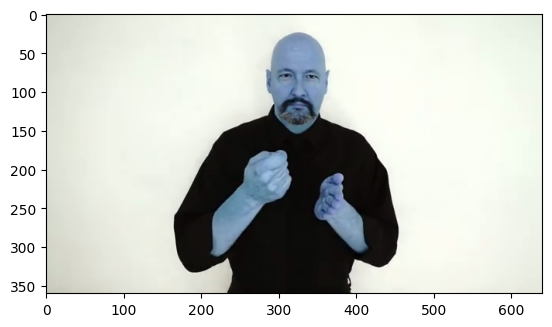

In [25]:
plt.imshow( frame_data[53])